In [20]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df["CHAS"] = df["CHAS"].fillna(df["CHAS"].mode()[0])
df["CRIM"] = df["CRIM"].fillna(df["CRIM"].mean())
df["ZN"] = df["ZN"].fillna(df["ZN"].median())
df["INDUS"] = df["INDUS"].fillna(df["INDUS"])
df["AGE"] = df["AGE"].fillna(df["AGE"].mean())
df["LSTAT"] = df["LSTAT"].fillna(df["LSTAT"].median())
#df[] = df[].fillna(df[])

In [4]:
rad_to_indus_mapping = df[df['INDUS'].notnull()].drop_duplicates('RAD')[['RAD', 'INDUS']]
rad_to_indus_dict = dict(zip(rad_to_indus_mapping['RAD'], rad_to_indus_mapping['INDUS']))

df['INDUS'] = df['INDUS'].fillna(df['RAD'].map(rad_to_indus_dict))


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

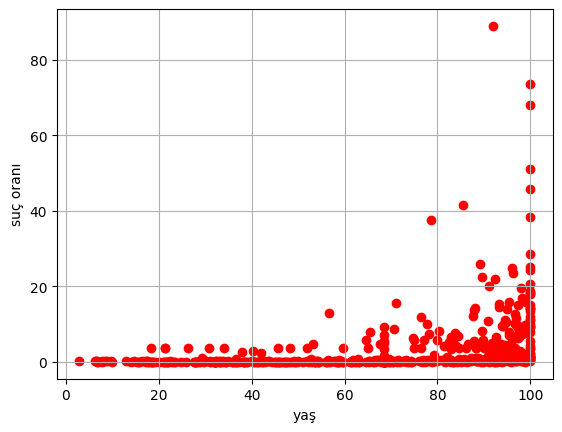

In [6]:
plt.scatter(df["AGE"], df["CRIM"], color="red")
plt.grid()
plt.xlabel("yaş")
plt.ylabel("suç oranı")
plt.show()

<BarContainer object of 506 artists>

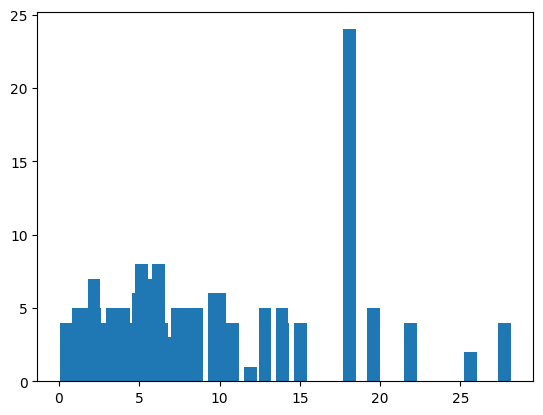

In [24]:
plt.bar(df["INDUS"],df["RAD"])